In [66]:
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
model.eval()

Using cache found in /Users/erbao/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to /Users/erbao/.cache/torch/hub/checkpoints/fcn_resnet50_coco-1167a1af.pth
100.0%


FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [67]:
import os
import sys
sys.path.insert(1, '../')
import util

input_dir = "../../Dataset/LavalIndoor/crop/"
nms = os.listdir(input_dir)
handle = util.PanoramaHandler()
tone = util.TonemapHDR()

In [82]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

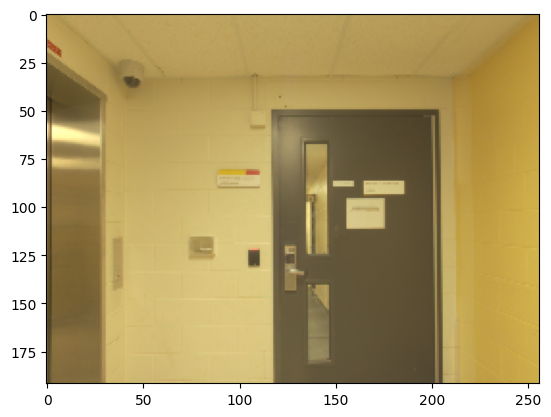

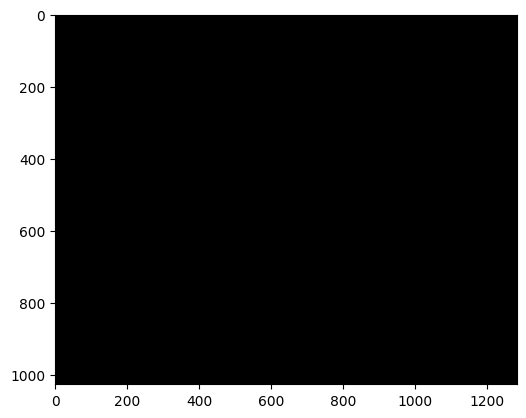

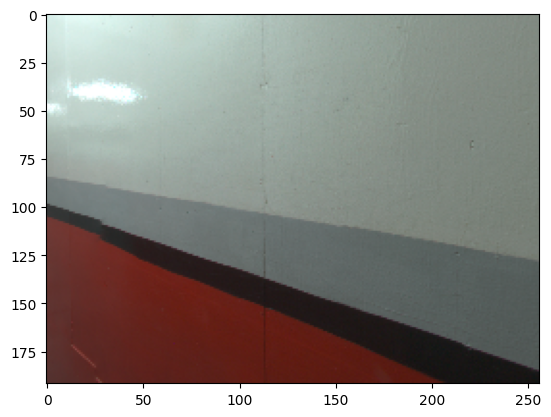

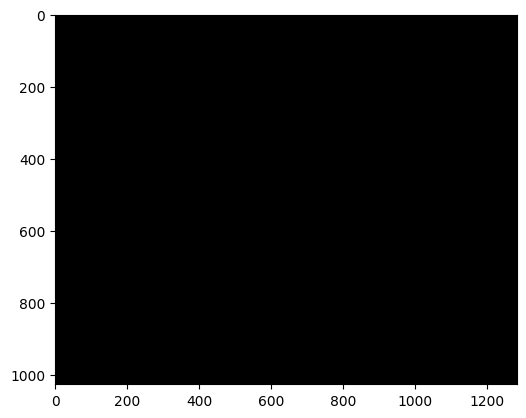

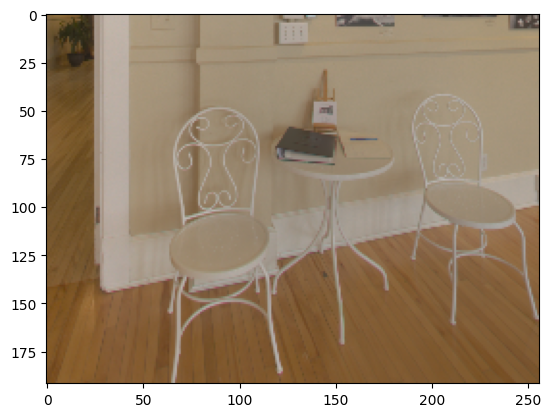

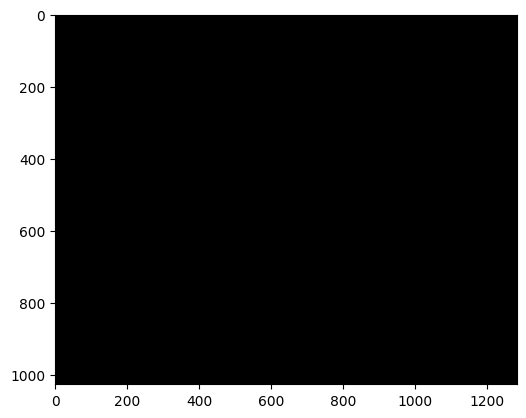

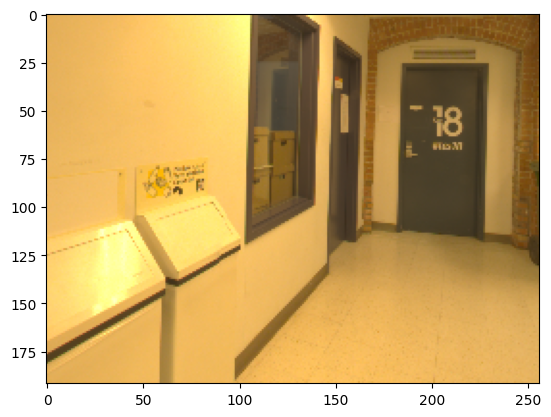

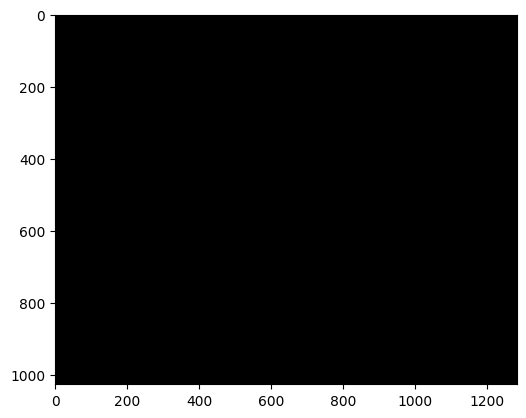

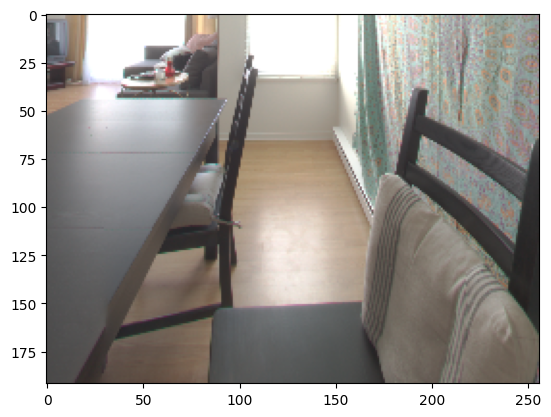

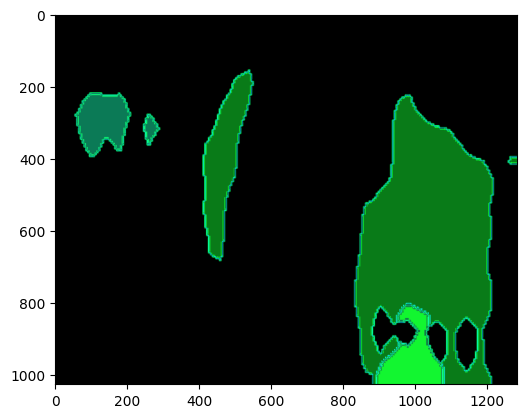

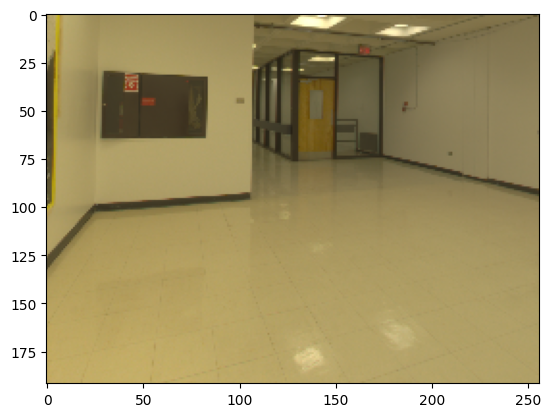

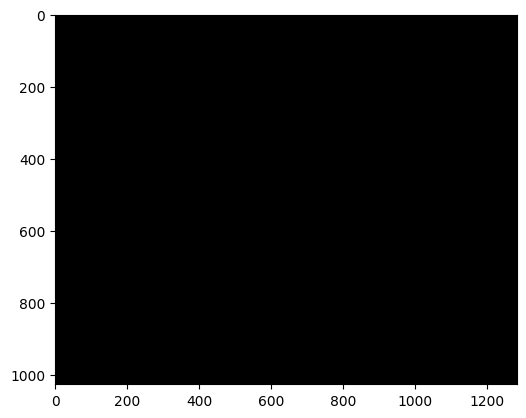

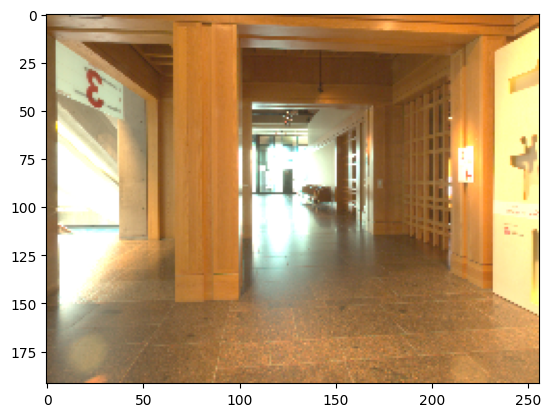

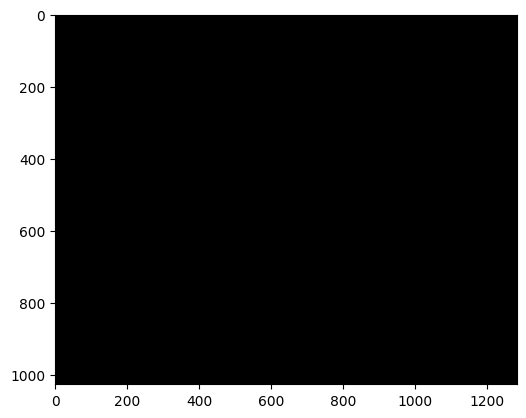

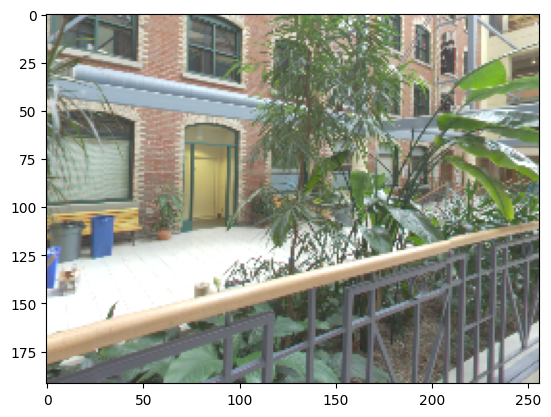

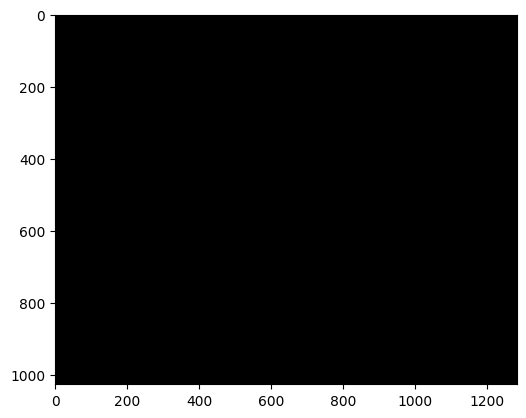

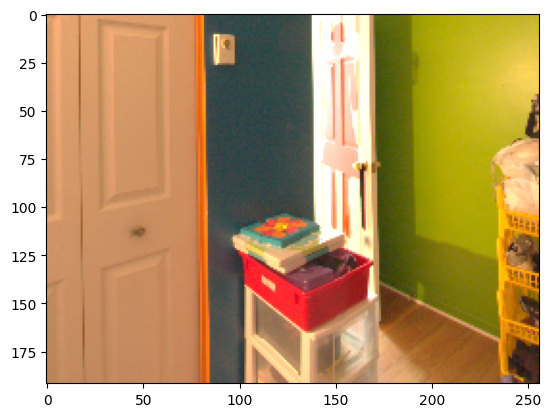

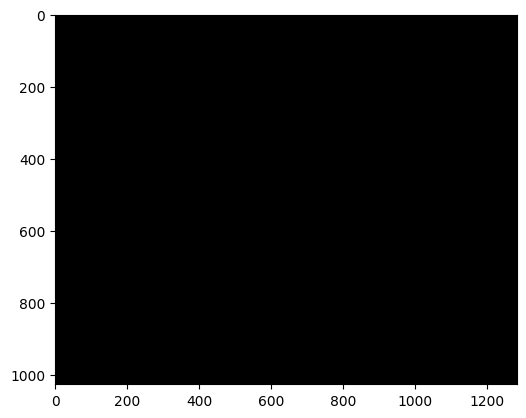

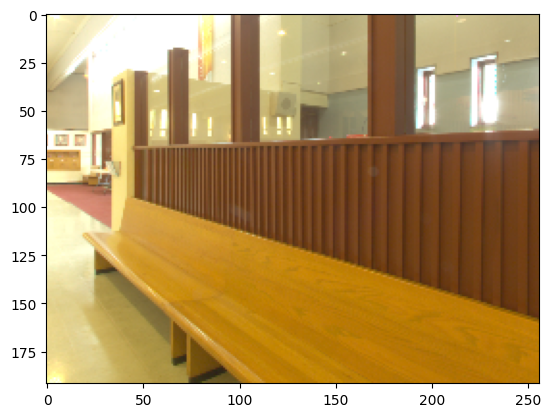

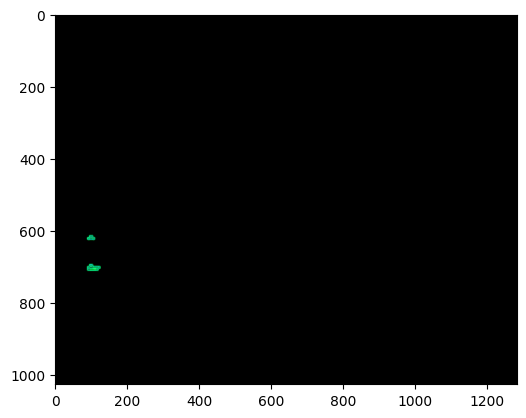

In [95]:
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

i = 0
for nm in nms:
    if nm.endswith('.exr') and i < 10:
        path = input_dir + nm
        exr = handle.read_hdr(path)
        img = tone(exr, True)[0]
        img = torch.from_numpy(img) # (H, W, C)
        img = torch.movedim(img, (0, 1, 2), (1, 2, 0)) # (C, H, W)
#         img = preprocess(img)

        plt.imshow(torch.movedim(img, (1, 2, 0), (0, 1, 2)))
        plt.show()
        img = torch.unsqueeze(img, 0)
        out = model(img)['out'][0]
        out = out.argmax(0)

        semantics = Image.fromarray(out.byte().cpu().numpy()).resize(input_image.size)
        semantics.putpalette(colors)
        
        plt.imshow(semantics)
        plt.show()
        
        i = i + 1

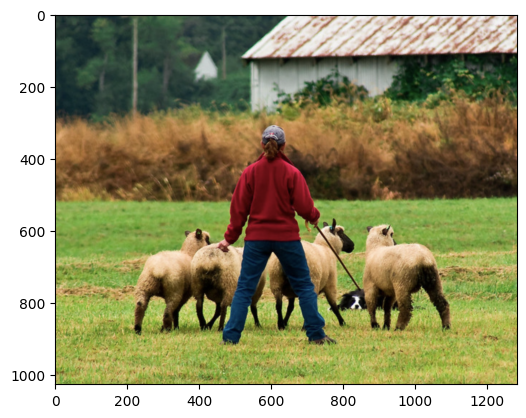

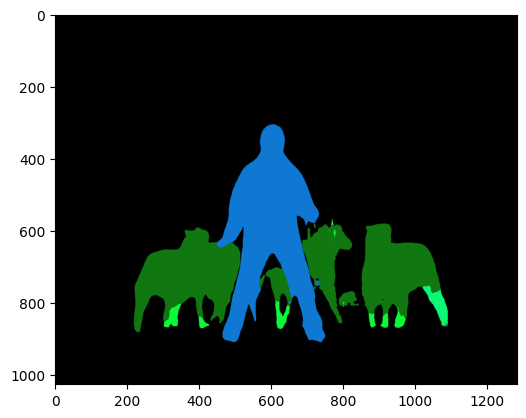

In [103]:
import cv2
import numpy as np

img = cv2.cvtColor(cv2.imread('deeplab1.png'), cv2.COLOR_BGR2RGB).astype(np.float32)
img /= 255
plt.imshow(img)
plt.show()

img = torch.from_numpy(img) # (H, W, C)
img = torch.movedim(img, (0, 1, 2), (1, 2, 0)) # (C, H, W)
img = torch.unsqueeze(img, 0)

out = model(img)['out'][0]
out = out.argmax(0)

semantics = Image.fromarray(out.byte().cpu().numpy()).resize(input_image.size)
semantics.putpalette(colors)

plt.imshow(semantics)
plt.show()